<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Custos Médicos de Clientes**

# **Introdução**

  Ao traçar o perfil dos clientes de planos de saúde dos EUA é possível relacionar suas características com as despesas médicas. Estudo fundamental que ajuda a precificar os serviços dado determinadas caracterísricas do Cliente.
  Este estudo busca relacionar as principais características que alteram as despezas médicas do cliente.

## Importação dos dados

 Os dados foram retirados do Kaggle (https://www.kaggle.com/mirichoi0218/insurance)
 Um arquivo em formato CSV contendo as seguintes características de 1338 pessoas: 
 - Idade;
 - Sexo;
 - Índice de Massa corporal;
 - Crianças inclusas no plano;
 - Fumante;
 - Região;
 - Gastos.

**O dataset foi alocado no GitHub para um acesso mais rápido, nenhuma caracteristica do arquivo original foi modificada.**


In [38]:
#Biblioteca Pandas usada para estruturar o dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/medical_cost_personal/insurance.csv'
dados = pd.read_csv(url)

In [39]:
#Leitural das 5 primeiras linhas do data set
#Conferir colunas a serem trabalhadas e formato dos dados
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Uma breve descrição dos dados, quantidade de linhas, média, valores mínimos e máximos.

É possível inferir que existem gastos muitos discrepantes em relação a média (min e max) e um alto desvio padrão (std).

In [40]:

dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
#Quantidade de linhas e colunas do dataset
dados.shape

(1338, 7)

## Algum pré-processamento interessante antes de prosseguir: 

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares(deixar as variáveis em uma escala menor ajuda no desempenho da maioria dos algorítimos de machine learning)

In [42]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['sex'] = dados['sex'].map({'male': 0, 'female': 1})

dados['charges'] = dados['charges']/1000

dados2 = dados

**Variáveis consideradas na análise, nesse primeiro momento: charges, bmi, smoker.**

In [43]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---

## Gráficos pertinentes


In [44]:
#Biblioteca seaborn ajuda na contrução rápida de gráficos
import seaborn as sns

Gráfico **Scatterplot** ajuda a visualizar possíveis relações entre as varáveis alvo

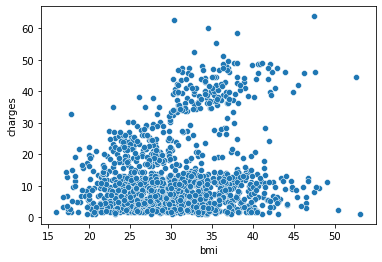

In [45]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados);

Adicionando a variável **Smoker** é possível ver uma correlação com os gastos (charges)

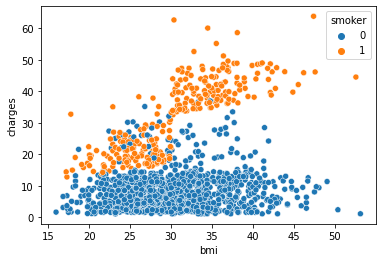

In [46]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## Cenário 1: considerando apenas a variável **bmi**.

In [47]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges'] 


Preparação para a validação do tipo Holdout
 A validação Holdout consiste em uma separação da base de dados em uma amostra para treino e outra para teste. Em que as amostras de teste sejam independêntes e não utilizadas para o treinamento.



In [48]:
# Holdout
# Separando em dados teste e treinamento 
#Biblioteca sklearn fica responsável pela separação e contrução do modelo
from sklearn.model_selection import train_test_split 
#Base de dados dividida em uma proporção de 74% para treinamento, e 26% para teste.
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.26)

In [49]:
#mostar as quantidades que foram divididas em treino e em teste
print(Xtreino.shape)
print(Xteste.shape)

(990, 1)
(348, 1)


###Criação do Modelo de Regressão Linear

A biblioteca **Sklearn** possui o algoritimo de Regressão Linear pronta (LinearRegresssion), nela é possível fazer ajustes no modelo, ou utiliza-lá com as opções default, como abaixo

In [50]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Predição
Predição são os resultados que a rede treinada retorna ao passar um conjunto de dados(Xteste) somente com as variáveis de interesse, e vendo quais previsões ela retorna.

In [51]:
# Predição utilizando a amostra teste
preditos = reg.predict(Xteste)
preditos

array([11.71035289, 15.32890978, 12.00008057, 18.19984769, 14.23280716,
       10.97894246,  8.13029129, 19.73965913, 17.56163637, 13.17519983,
       12.44581546, 10.44406059,  9.93956973, 15.32283158, 12.44176333,
       14.09706062, 14.54482158,  9.90107445,  7.283395  , 14.18823367,
       10.47850374, 11.97981989, 16.23861417, 14.48201349, 15.63687207,
       13.01919262, 15.71386264, 12.89560249, 12.32627747,  8.9386923 ,
       12.24928689, 14.91761804, 14.76768903, 13.58041336, 13.3778066 ,
       13.13467847, 13.28865962, 13.21166905,  9.78558859, 12.09327968,
       13.90458419, 10.0165603 , 13.25016433, 15.21342392, 13.82759362,
       17.52314108, 13.3271549 , 15.75235792, 12.71123033, 11.42467735,
       12.82671619, 17.21923093, 11.36389532, 14.48201349, 14.00993971,
       13.40414548, 13.4588493 , 15.36740506, 15.32890978, 11.47938117,
       13.86608891, 15.98332964, 18.19984769, 17.93240676, 11.78734346,
       15.39171788, 13.21166905, 12.68894358, 14.02007005, 12.67

###Métricas
Como medida para avaliar o modelo, foi utilizado o **erro quadrático médio**, que consiste em subtrair o valor predito do valor real para cada entrada, elevar o resultado da diferença ao quadrado, repetindo o processo e somando para cada entrada, e depois dividindo pelo total de entradas.

O número gerado como resultado serve como parâmetro de comparação para outros modelos, a fim de determinar qual melhor modelo e quais melhores variáveis para se obter um resultado do erro menor.

O valor do erro em sí não é interpretavél. Ele é usado apenas como parâmetro de comparação com outro modelo.

In [52]:
#biblioteca numpy utilizada para auxiliar e simplificar os calculos de erro quadrático médio
import numpy as np
np.mean((preditos - yteste)**2)

134.3307404549396

A biblioteca **Sklearn** possui uma função (mean_squared_error) que faz o calculo do erro quadrático médio

In [53]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))#usado para arredondar para duas casas decimais

EQM : 134.33


Exibindos os coeficientes da função Linear do formato:


*Y = b0 + b1X*

sendo b0 o ponto de intersecção com o eixo Y, e b1 o coeficiente angular.


In [54]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coeficientes: \n', b1)


Intercepto: 
 0.8161869408071745
Coeficientes: 
 [0.40521354]


Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC**

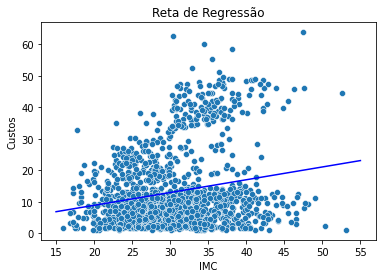

In [55]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

##Teste com todos os dados, sem separar em dois conjuntos (treino e teste)
Note agora o que aconteceria se ajustassemos e avaliassemos o modelo no mesmo conjunto de dados (nesse caso, os dados todos).

In [56]:
reg0 = LinearRegression()
reg0.fit(X, y)

preditos = reg0.predict(X)

eqm = mean_squared_error(y, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 140.78


---

## Cenário 2: considerando a variável **bmi** e **smoker**.

In [58]:
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

In [59]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 53.52


In [60]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -2.9240855313569796
Coeficientes: 
 [ 0.36992652 23.85618272]


In [61]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

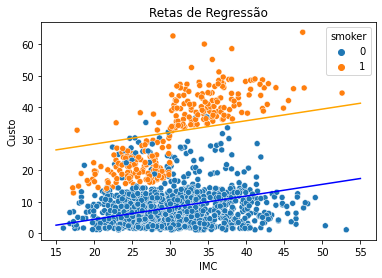

In [62]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

---

## **Repetição**

Repetições da técnica Holdout, variando quem vai para amostra de teste e treinamento.
 Os resultados do EQM para cada repetição são armazenados e é feita a média para obter uma valor mais estável para o EQM.

In [68]:
modelo = LinearRegression()
replicas = 100
proporcao = 0.25

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

eqms_treino = []
eqms_teste = []

for i in range(replicas):
    Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
    
    #Treinando o Modelo
    reg = modelo
    reg.fit(Xtreino, ytreino)

    #Verificando o eqm no teste
    preditos_treino = reg.predict(Xtreino)
    eqm_treino = mean_squared_error(ytreino, preditos_treino)

    preditos_teste = reg.predict(Xteste)
    eqm_teste = mean_squared_error(yteste, preditos_teste)

    #Guardando o resultado
    eqms_treino.append(eqm_treino)
    eqms_teste.append(eqm_teste)
  
res_treino = np.array(eqms_treino).mean().round(2)
res_teste = np.array(eqms_teste).mean().round(2)

print('EQM médio de TREINO: {}'.format(res_treino))
print('EQM médio de TESTE: {}'.format(res_teste))

EQM médio de TREINO: 36.53
EQM médio de TESTE: 37.37


Quando os valores do treino e do teste estão próximos, siginifica que não houve overfiting de treinamento e o modelo tem boa capacidade de generalização para aquele conjunto de dados.

Vamos implementar mais dados e ver se melhoramos os resultados

In [69]:
modelo = LinearRegression()
replicas = 100
proporcao = 0.25

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

eqms_treino = []
eqms_teste = []

for i in range(replicas):
    Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
    
    #Treinando o Modelo
    reg = modelo
    reg.fit(Xtreino, ytreino)

    #Verificando o eqm no teste
    preditos_treino = reg.predict(Xtreino)
    eqm_treino = mean_squared_error(ytreino, preditos_treino)

    preditos_teste = reg.predict(Xteste)
    eqm_teste = mean_squared_error(yteste, preditos_teste)

    #Guardando o resultado
    eqms_treino.append(eqm_treino)
    eqms_teste.append(eqm_teste)
  
res_treino = np.array(eqms_treino).mean().round(2)
res_teste = np.array(eqms_teste).mean().round(2)

print('EQM médio de TREINO: {}'.format(res_treino))
print('EQM médio de TESTE: {}'.format(res_teste))

EQM médio de TREINO: 36.71
EQM médio de TESTE: 36.87
